In [19]:
# Exploratory Data Analysis (EDA) for Sales Analytics Project
# Author: Girish Kumar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

RAW_PATH = Path("../data/raw/")
PROC_PATH = Path("../data/processed/")


Load datasets

In [20]:
sales = pd.read_csv(RAW_PATH / "sales_raw.csv")
products = pd.read_csv(RAW_PATH / "Products_Data.csv")
customers = pd.read_csv(RAW_PATH / "Customer_Data.csv")
regions = pd.read_csv(RAW_PATH / "Regions_Table.csv")
dates = pd.read_csv(RAW_PATH / "DateTable.csv")


Initial overview

In [21]:
datasets = {
    "Sales": sales,
    "Products": products,
    "Customers": customers,
    "Regions": regions,
    "Dates": dates
}

for name, df in datasets.items():
    print(f"\n{name} → Shape: {df.shape}")
    display(df.head())



Sales → Shape: (7991, 15)


,OrderNumber,Order_Date,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,Unit Cost,Sales,Total Cost,Profit
0,SO - 0001219,2017-01-05 00:00:00.000,2017-01-20 00:00:00.000,20,Wholesale,NZD,AXW291,54,7,5,180.90,130.25,904.50,651.24,253.26
1,SO - 0004448,2017-01-12 00:00:00.000,2017-01-21 00:00:00.000,44,Wholesale,NZD,AXW291,64,7,11,"3,845.80","2,615.14","42,303.80","28,766.58","13,537.22"
2,SO - 0002409,2017-01-17 00:00:00.000,2017-01-29 00:00:00.000,6,Wholesale,NZD,AXW291,51,7,9,"1,105.50",773.85,"9,949.50","6,964.65","2,984.85"
3,SO - 0003600,2017-01-19 00:00:00.000,2017-02-06 00:00:00.000,45,Wholesale,NZD,AXW291,55,7,5,207.70,145.39,"1,038.50",726.95,311.55
4,SO - 0004807,2017-01-19 00:00:00.000,2017-02-04 00:00:00.000,14,Wholesale,NZD,AXW291,20,7,10,"1,005.00",582.90,"10,050.00","5,829.00","4,221.00"



Products → Shape: (15, 2)


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5



Customers → Shape: (50, 2)


,Customer Index,Customer Names
0,1,Avon Corp
1,2,WakeFern
2,3,"Elorac, Corp"
3,4,ETUDE Ltd
4,5,Procter Corp



Regions → Shape: (100, 7)


,Index,Suburb,City,postcode,Longitude,Latitude,Full Address
0,1,Freemans Bay,Auckland,1011,174.75,-36.86,"Picton Street, Freemans Bay, Auckland"
1,2,Nightcaps,Southland,9630,168.03,-45.97,"Lyne Street, Nightcaps, Southland"
2,3,Northcote,North Shore,627,174.76,-36.80,"McBreen Avenue, Northcote, North Shore"
3,4,Bay View,Napier,4104,176.87,-39.44,"Ferguson Street South, Bay View, Napier"
4,5,Parklands,Christchurch,8083,172.71,-43.47,"Forest Drive, Parklands, Christchurch"



Dates → Shape: (1095, 13)


,Date,Year,Quarter,Quarter No,Month No,Month Name,Month Short Name,Month Short Name Plus Year,DateSort,Day Name,Details,Day Number,Month Sort
0,2017-01-01 00:00:00.000,2017,Q1,1,1,January,Jan,"Jan,17",20170101,Sunday,01-Jan-2017,1,201701
1,2017-01-02 00:00:00.000,2017,Q1,1,1,January,Jan,"Jan,17",20170102,Monday,02-Jan-2017,2,201701
2,2017-01-03 00:00:00.000,2017,Q1,1,1,January,Jan,"Jan,17",20170103,Tuesday,03-Jan-2017,3,201701
3,2017-01-04 00:00:00.000,2017,Q1,1,1,January,Jan,"Jan,17",20170104,Wednesday,04-Jan-2017,4,201701
4,2017-01-05 00:00:00.000,2017,Q1,1,1,January,Jan,"Jan,17",20170105,Thursday,05-Jan-2017,5,201701


Clean Sales Data

In [22]:
sales = sales.dropna(how="all").reset_index(drop=True) # Remove blank rows in Sales

sales.columns = (    # Fix column names
    sales.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
                  .str.replace("-", "_")
)

# Convert data types
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce")
sales["ship_date"] = pd.to_datetime(sales["ship_date"], errors="coerce")

num_cols = ["order_quantity", "unit_selling_price", "unit_cost", "sales", "total_cost", "profit"]
for col in num_cols:
    sales[col] = pd.to_numeric(sales[col], errors="coerce")


Missing values

In [23]:
sales.isna().sum().sort_values(ascending=False)


ordernumber                  0
order_date                   0
ship_date                    0
customer_name_index          0
channel                      0
currency_code                0
warehouse_code               0
delivery_region_index        0
product_description_index    0
order_quantity               0
unit_selling_price           0
unit_cost                    0
sales                        0
total_cost                   0
profit                       0
dtype: int64

Dimension Table EDA

Products Table

In [24]:
products.info()
products.describe(include="all")


<class 'pandas.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Index         15 non-null     int64
 1   Product Name  15 non-null     str  
dtypes: int64(1), str(1)
memory usage: 372.0 bytes


,Index,Product Name
count,15.00,15
unique,NaN,15
top,NaN,Product 1
freq,NaN,1
mean,8.33,NaN
std,5.16,NaN
min,1.00,NaN
25%,4.50,NaN
50%,8.00,NaN
75%,11.50,NaN


Missing product indices?

In [25]:
missing_products = set(sales["product_description_index"]) - set(products["Index"])
missing_products


set()

Customers Table

In [26]:
customers.info()
customers["Customer Names"].nunique()

# Check for duplicates:

customers["Customer Names"].value_counts().head()


<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer Index  50 non-null     int64
 1   Customer Names  50 non-null     str  
dtypes: int64(1), str(1)
memory usage: 932.0 bytes


Customer Names
Avon Corp       1
WakeFern        1
Elorac, Corp    1
ETUDE Ltd       1
Procter Corp    1
Name: count, dtype: int64

Regions Table

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         100 non-null    int64  
 1   Suburb        100 non-null    str    
 2   City          100 non-null    str    
 3   postcode      100 non-null    int64  
 4   Longitude     100 non-null    float64
 5   Latitude      100 non-null    float64
 6   Full Address  100 non-null    str    
dtypes: float64(2), int64(2), str(3)
memory usage: 5.6 KB


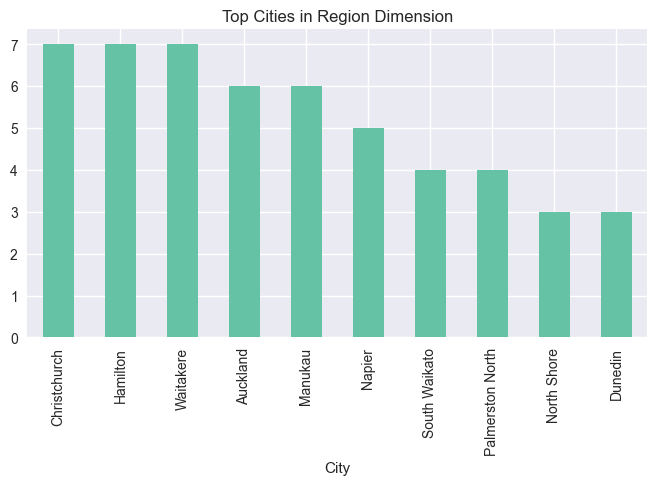

In [27]:
regions.info()
regions["City"].value_counts().head(10)

plt.figure(figsize=(8,4))
regions["City"].value_counts().head(10).plot(kind="bar")
plt.title("Top Cities in Region Dimension")
plt.show()


Date Table

In [28]:
# Check continuity:
dates["Date"] = pd.to_datetime(dates["Date"])
date_range = (dates["Date"].min(), dates["Date"].max())
date_range


# Missing dates?
full_range = pd.date_range(dates["Date"].min(), dates["Date"].max())
missing_dates = set(full_range) - set(dates["Date"])
len(missing_dates)


0

##### Fact Table EDA (Sales)

In [29]:
# Summary
sales.info()
sales.describe().T




<class 'pandas.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ordernumber                7991 non-null   str           
 1   order_date                 7991 non-null   datetime64[us]
 2   ship_date                  7991 non-null   datetime64[us]
 3   customer_name_index        7991 non-null   int64         
 4   channel                    7991 non-null   str           
 5   currency_code              7991 non-null   str           
 6   warehouse_code             7991 non-null   str           
 7   delivery_region_index      7991 non-null   int64         
 8   product_description_index  7991 non-null   int64         
 9   order_quantity             7991 non-null   int64         
 10  unit_selling_price         7991 non-null   float64       
 11  unit_cost                  7991 non-null   float64       
 12  sales            

,count,mean,min,25%,50%,75%,max,std
order_date,7991,2018-06-22 01:36:56.944062,2017-01-01 00:00:00,2017-09-23 00:00:00,2018-06-20 00:00:00,2019-03-20 00:00:00,2019-12-12 00:00:00,NaN
ship_date,7991,2018-07-02 12:04:35.710174,2017-01-05 00:00:00,2017-10-03 00:00:00,2018-07-01 00:00:00,2019-04-01 00:00:00,2019-12-28 00:00:00,NaN
customer_name_index,"7,991.00",25.46,1.00,13.00,25.00,38.00,50.00,14.41
delivery_region_index,"7,991.00",50.45,1.00,25.00,50.00,76.00,100.00,28.86
product_description_index,"7,991.00",6.34,1.00,2.00,7.00,11.00,14.00,4.12
order_quantity,"7,991.00",8.46,5.00,6.00,8.00,10.00,12.00,2.28
unit_selling_price,"7,991.00","2,284.54",167.50,"1,031.80","1,849.20","3,611.30","6,566.00","1,673.10"
unit_cost,"7,991.00","1,431.91",68.67,606.12,"1,080.58","2,040.25","5,498.56","1,112.41"
sales,"7,991.00","19,343.40",837.50,"7,959.60","13,989.60","27,436.50","78,711.60","15,586.13"
total_cost,"7,991.00","12,111.63",351.75,"4,745.21","8,779.68","16,841.19","65,330.63","10,250.52"



Missing Values


In [30]:
sales.isna().sum().sort_values(ascending=False)

ordernumber                  0
order_date                   0
ship_date                    0
customer_name_index          0
channel                      0
currency_code                0
warehouse_code               0
delivery_region_index        0
product_description_index    0
order_quantity               0
unit_selling_price           0
unit_cost                    0
sales                        0
total_cost                   0
profit                       0
dtype: int64

Numeric distributions

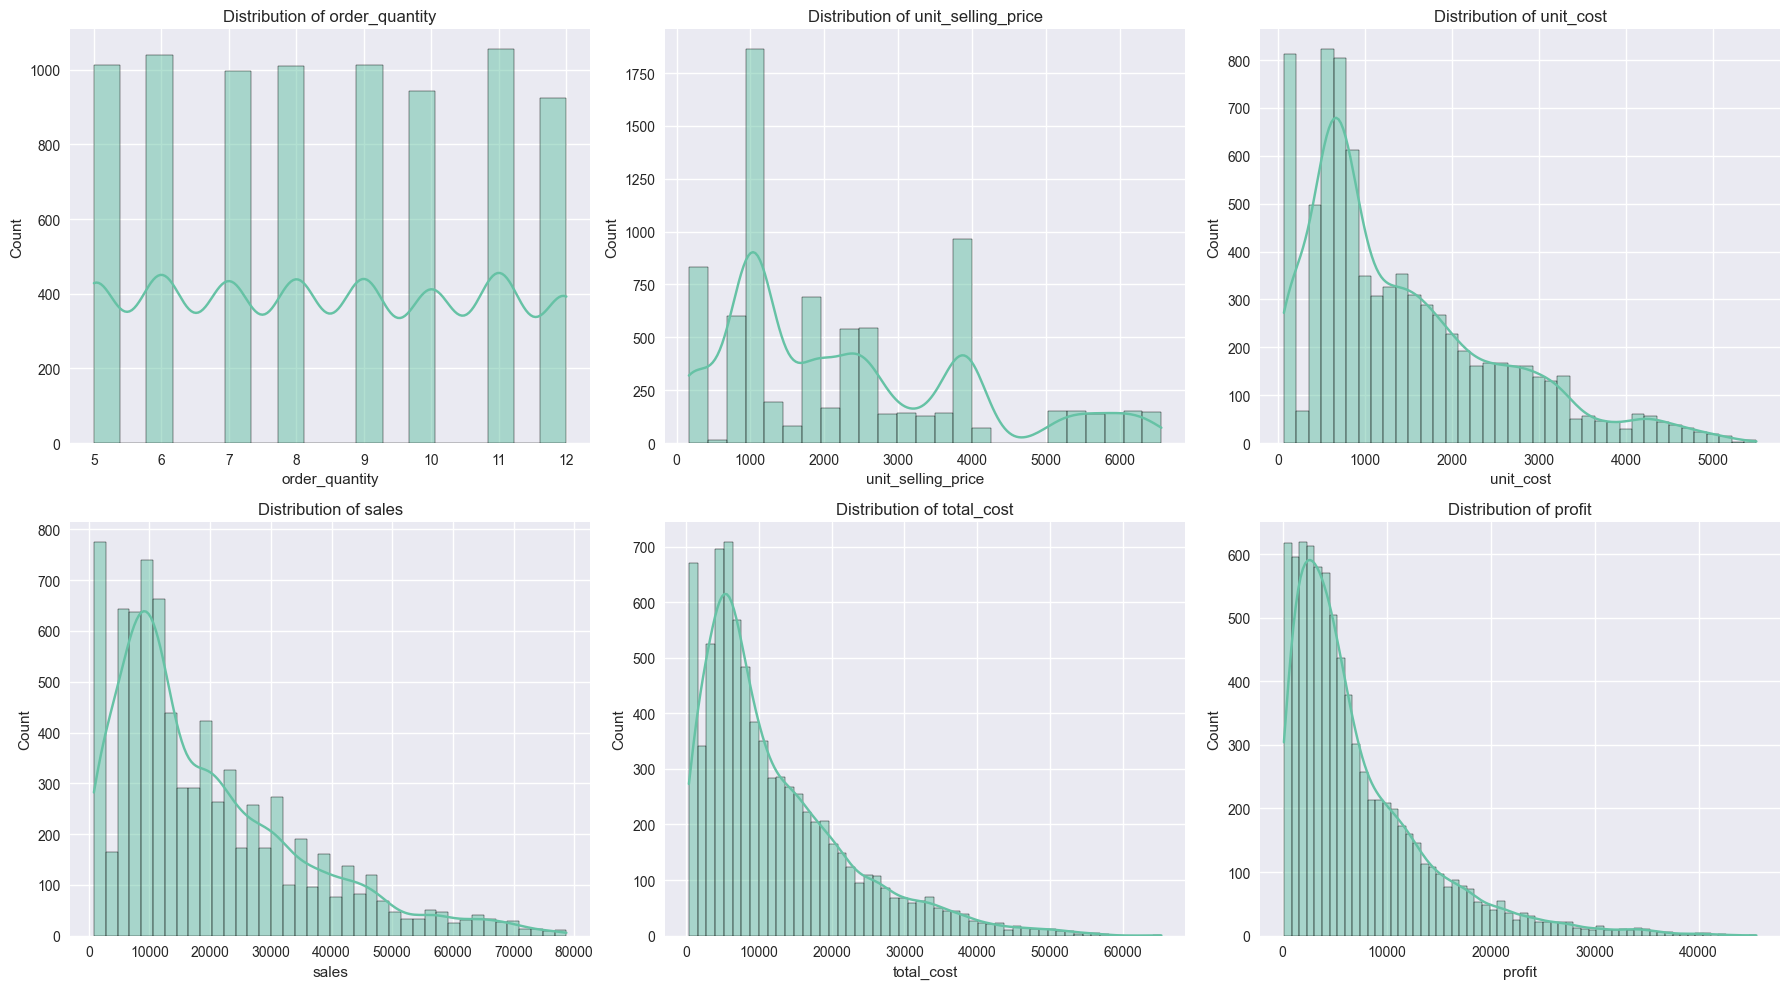

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(sales[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


Outliers

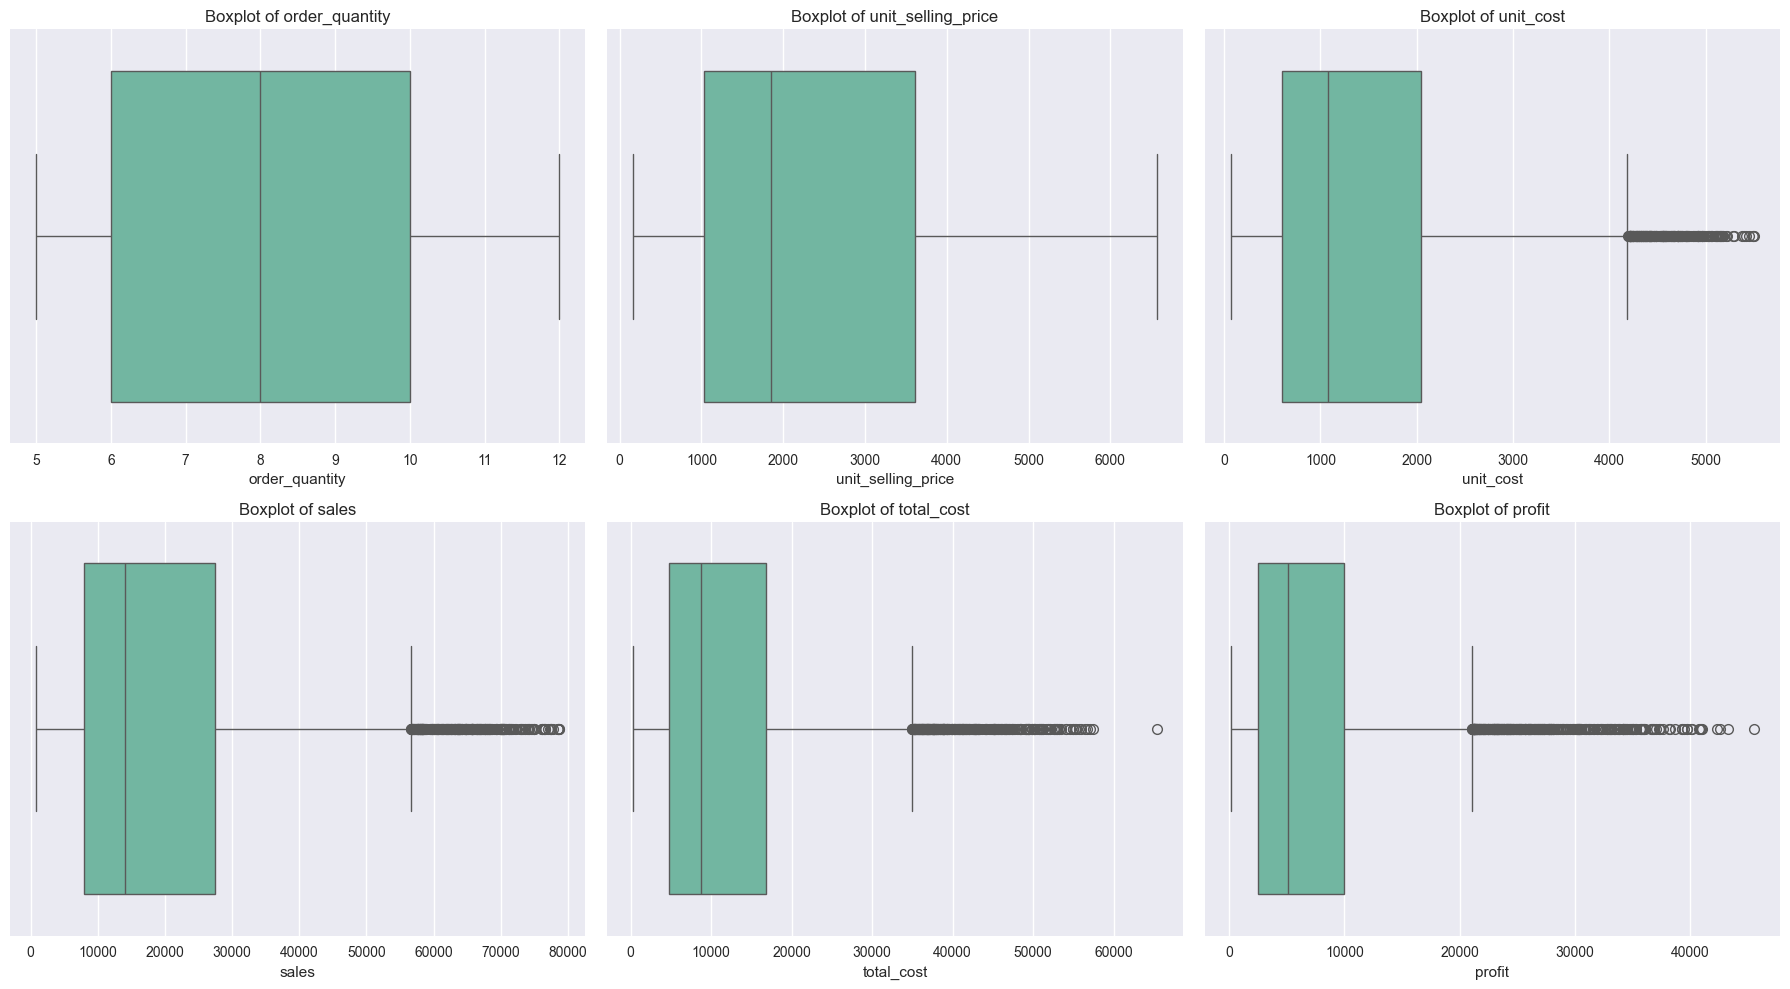

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(x=sales[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


##### Relationship Validation

Orphaned Product Keys

In [33]:
orphans_products = sales[~sales["product_description_index"].isin(products["Index"])]
orphans_products.shape


(0, 15)

Orphaned Customer Keys

In [34]:
orphans_customers = sales[~sales["customer_name_index"].isin(customers["Customer Index"])]
orphans_customers.shape


(0, 15)

Orphaned Region Keys

In [35]:
orphans_regions = sales[~sales["delivery_region_index"].isin(regions["Index"])]
orphans_regions.shape


(0, 15)

##### Joined analysis (Products, Customers, Regions)

Merge Sales with Products

In [36]:
sales_prod = sales.merge(products, left_on="product_description_index", right_on="Index", how="left")


Top products

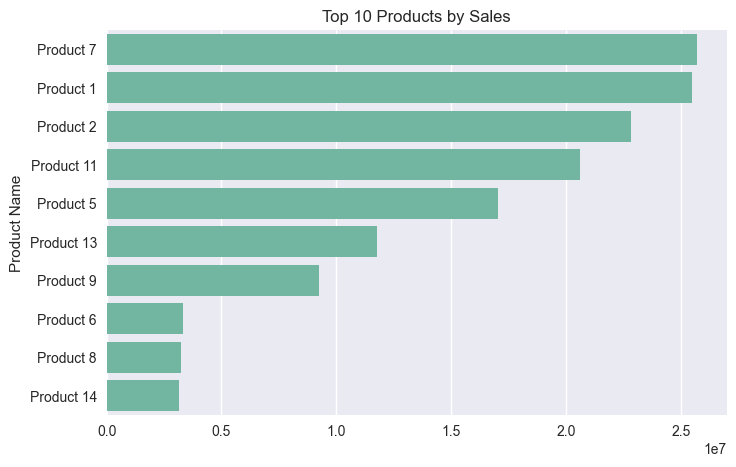

In [37]:
top_products = (
    sales_prod.groupby("Product Name")["sales"]
              .sum()
              .sort_values(ascending=False)
              .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.show()


Merge Sales with Customers

In [38]:
sales_cust = sales.merge(customers, left_on="customer_name_index", right_on="Customer Index", how="left")


Top customers:

In [39]:
top_customers = (
    sales_cust.groupby("Customer Names")["sales"]
              .sum()
              .sort_values(ascending=False)
              .head(10)
)

top_customers


Customer Names
Medline         4,081,485.90
Pure Group      3,821,592.90
OUR Ltd         3,676,035.40
Eminence Corp   3,643,426.50
Apotheca, Ltd   3,608,492.70
Apollo Ltd      3,600,358.90
OHTA'S Corp     3,533,801.10
Ole Group       3,462,881.60
Victory Ltd     3,407,814.30
Ohio            3,347,681.80
Name: sales, dtype: float64

Merge Sales with Regions

In [40]:
sales_reg = sales.merge(regions, left_on="delivery_region_index", right_on="Index", how="left")


Sales by city:

In [41]:
city_sales = (
    sales_reg.groupby("City")["sales"]
             .sum()
             .sort_values(ascending=False)
             .head(10)
)

city_sales


City
Christchurch       11,526,693.40
Hamilton           11,490,895.30
Waitakere          11,193,020.00
Manukau             9,759,802.90
Napier              7,748,503.10
Auckland            7,463,277.40
Palmerston North    6,967,477.40
South Waikato       6,586,897.30
Whangarei           4,781,240.60
North Shore         4,604,990.40
Name: sales, dtype: float64

Time Series Analysis

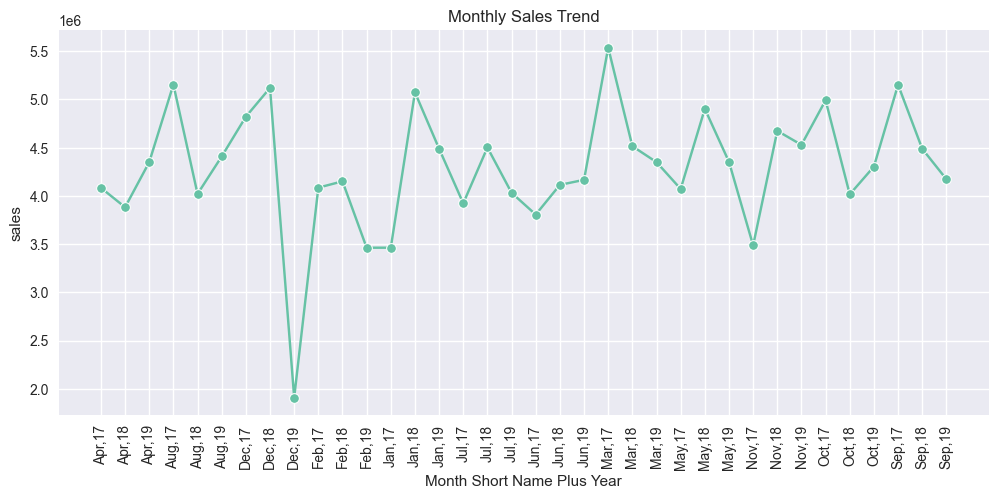

In [42]:
sales_time = sales.merge(dates, left_on="order_date", right_on="Date", how="left")



# Monthly sales:
monthly_sales = (
    sales_time.groupby("Month Short Name Plus Year")["sales"]
              .sum()
              .reset_index()
)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x="Month Short Name Plus Year", y="sales", marker="o")
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.show()


##### Correlation Analysis

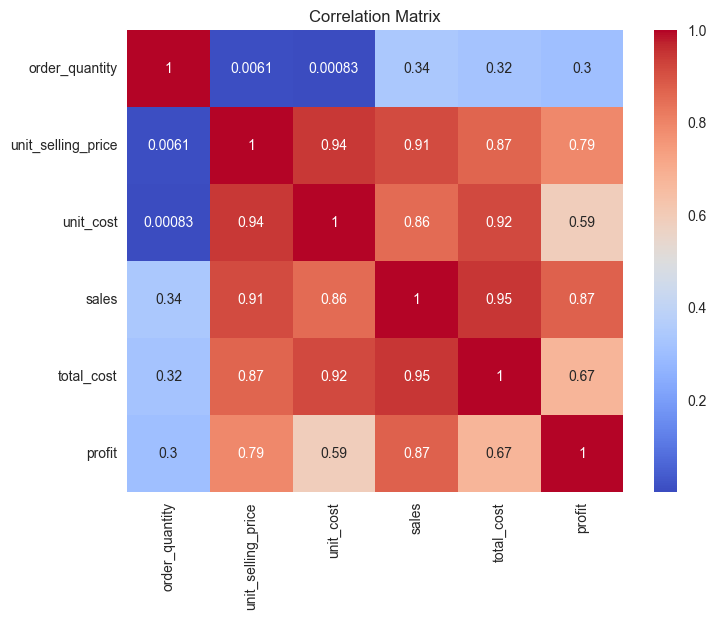

In [43]:
corr = sales[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Save cleaned dataset

In [44]:
PROC_PATH.mkdir(exist_ok=True)
sales.to_csv(PROC_PATH / "sales_cleaned.csv", index=False)
